### Randomness
Elements of Data Science Week 5

#### A random distributions play a large role in statistical inference

In [1]:
import numpy as np

#### Randomized control study

In [2]:
two_groups = np.array(['treatment', 'control'])
np.random.choice(two_groups)

'control'

In [3]:
np.random.choice(two_groups, 10)

array(['treatment', 'control', 'treatment', 'treatment', 'treatment',
       'treatment', 'control', 'treatment', 'treatment', 'treatment'],
      dtype='<U9')

#### Coin toss

In [8]:
# tosses = make_array('Tails', 'Heads', 'Tails', 'Heads', 'Heads')
toss = np.array(['Heads', 'Tails'])
tosses=np.random.choice(toss,10)
tosses == 'Heads'

array([ True,  True, False, False,  True,  True, False, False,  True,
        True])

In [9]:
np.count_nonzero(tosses == 'Heads')

6

## Dice game gambling

* roll: 0 or 1 = -\$1
* roll: 2 or 3 =  0 
* roll: 4 or 5 = +\$1



In [10]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

#### Iteration

In [14]:
outcomes = np.array([])

for i in np.arange(600):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
print(outcomes[0:10])
len(outcomes)

[-1. -1.  0.  1.  0. -1.  1.  1.  1.  1.]


600

In [15]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

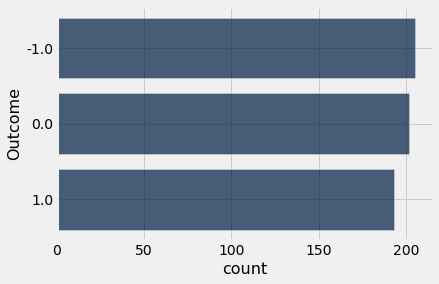

In [16]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table.group('Outcome').barh(0)

In [29]:
outcomes = np.array([])
walk = 0
for i in np.arange(600):
    outcome_of_bet = bet_on_one_roll()
    walk += outcome_of_bet
    outcomes = np.append(outcomes, walk)
    
print(outcomes[0:10])
len(outcomes)

[ 1.  2.  1.  0. -1. -2. -1.  0.  1.  1.]


600

In [32]:
random_walk = Table().with_columns(
    'Repetition', np.arange(1, 601),
    'Walk position', outcomes
)

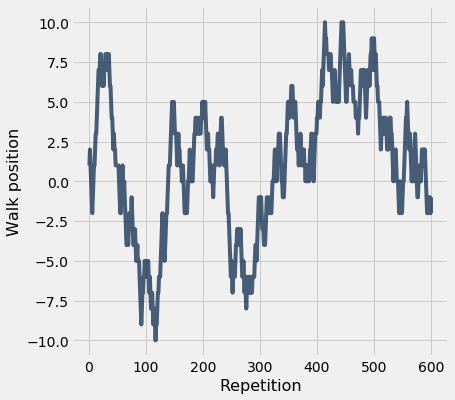

In [31]:
random_walk.plot(0,1)

## Worksheet

Set up a function which generates the sum of x roles of n-sided die. (Typical die have n=6 sides).

In [14]:
def role(n,x):
    die=np.arange(1,n+1) # Remember n+1 yields n  
    return sum(np.random.choice(die, x))
role(6,2)

7

In [15]:
each_role = np.array([])
num_repetitions=1000
for i in np.arange(num_repetitions):
    one_move = role(6, 2)
    each_role = np.append(each_role, one_move)

In [16]:
results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls', each_role
)

results

Repetition,Sum of Two Rolls
1,9
2,10
3,4
4,9
5,10
6,3
7,7
8,7
9,3
10,8


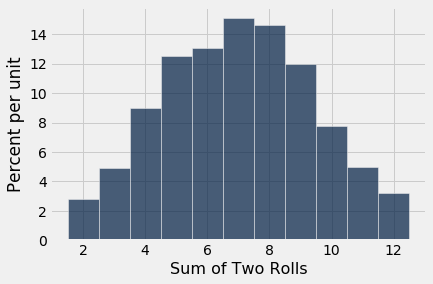

In [32]:
results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))